In [3]:
import pickle
import jax.numpy as jnp
import jax
jax.config.update('jax_enable_x64',True)
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
f1_vals = {}
l2_error = {}

file_paths = list(pathlib.Path('results').glob("*.pkl"))
def get_properties(path):
	pieces = str(path).split('_')
	noise_level = pieces[4]
	time_length = pieces[-1][:-4]
	run = pieces[1]
	return run,float(noise_level),float(time_length)

for pkl_file in file_paths:
	run,noise,length = get_properties(str(pkl_file))
	with open(pkl_file, 'rb') as file:
		results = pickle.load(file)
		f1_vals[(run,noise,length)] = results['coeff_mets']['f1']
		l2_error[(run,noise,length)] = results['coeff_mets']['coeff_rel_l2']

In [ ]:
df_f1 = pd.DataFrame(
	{(run,noise, length): val for (run,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
df_f1.groupby(['noise','length'])['recovered'].mean()
# df_f1 = df_f1.pivot(index='noise', columns='length', values='f1')

plt.imshow(np.log(df_error), aspect='auto', origin='lower', vmax=0)
plt.colorbar(label='log10(error)')
plt.xticks(ticks=np.arange(len(df_error.columns)), labels=[f"{col:.3f}" for col in df_error.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_error.index)), labels=[f"{idx:.3f}" for idx in df_error.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()

noise  length
0.025  4.0       0.818182
       5.0       0.818182
       6.0       0.636364
       7.0       0.727273
       8.0       0.909091
                   ...   
0.400  6.0       0.000000
       7.0       0.000000
       8.0       0.090909
       9.0       0.000000
       10.0      0.000000
Name: recovered, Length: 112, dtype: float64

In [28]:
df_f1 = pd.DataFrame(
	{(run,noise, length): val for (run,noise, length), val in f1_vals.items()},
	index=[0]
).T.reset_index()
df_f1.columns = ['run','noise', 'length', 'f1']
df_f1['recovered'] = (df_f1['f1']==1).astype('int')
# df_f1.groupby(['noise','length'])['recovered'].mean()
df_f1.sort_values(['length','noise','run'])

df_recovery = df_f1.groupby(['noise','length'])['recovered'].mean().unstack(level = 'length')

df_f1 = df_f1.groupby(['noise','length'])['f1'].mean().unstack(level = 'length')

In [29]:
df_recovery

length,4.0,5.0,6.0,7.0,8.0,9.0,10.0
noise,,,,,,,
0.025,0.818182,0.818182,0.636364,0.727273,0.909091,1.000000,0.909091
0.050,0.545455,0.363636,0.454545,0.454545,0.727273,0.727273,0.800000
0.075,0.272727,0.181818,0.454545,0.363636,0.727273,0.545455,0.600000
0.100,0.363636,0.000000,0.181818,0.181818,0.454545,0.454545,0.500000
0.125,0.272727,0.090909,0.181818,0.181818,0.363636,0.090909,0.400000
0.150,0.181818,0.181818,0.181818,0.272727,0.181818,0.181818,0.200000
0.175,0.181818,0.090909,0.181818,0.363636,0.000000,0.363636,0.200000
0.200,0.090909,0.090909,0.181818,0.272727,0.000000,0.181818,0.200000
0.225,0.000000,0.090909,0.181818,0.090909,0.000000,0.181818,0.100000


In [6]:
df_error = pd.DataFrame(
	{(run,noise, length): val for (run,noise, length), val in l2_error.items()},
	index=[0]
).T.reset_index()
df_error.columns = ['run','noise', 'length', 'error']
df_error = df_error.groupby(['noise','length'])['error'].mean()
df_error = df_error.unstack(level='length')
df_error = df_error.loc[::-1]

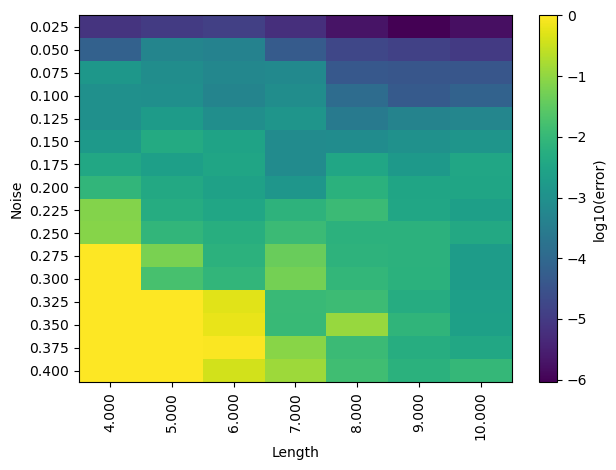

In [7]:
plt.imshow(np.log(df_error), aspect='auto', origin='lower', vmax=0)
plt.colorbar(label='log10(error)')
plt.xticks(ticks=np.arange(len(df_error.columns)), labels=[f"{col:.3f}" for col in df_error.columns], rotation=90)
plt.yticks(ticks=np.arange(len(df_error.index)), labels=[f"{idx:.3f}" for idx in df_error.index])
plt.xlabel('Length')
plt.ylabel('Noise')
plt.tight_layout()

In [4]:
path = "noise_ratio_0.025_tend_4.0.pkl"

with open(path, 'rb') as file:
    metrics = pickle.load(file)

In [5]:
metrics.keys()

dict_keys(['coeff_mets', 'theta'])

In [7]:
metrics['coeff_mets'].keys()

dict_keys(['precision', 'recall', 'f1', 'coeff_rel_l2', 'coeff_rmse', 'coeff_mae'])

In [10]:
jnp.log10(metrics['coeff_mets']["coeff_rel_l2"])

Array(-2.2942293, dtype=float32)